In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
# Load the data
file_path = 'Data\Cleaned_data_with_population.csv'
df = pd.read_csv(file_path)
df.head()


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,POPULATION,PC_HEALTHXP_GROWTH,PC_GDP_GROWTH,USD_CAP_GROWTH,TOTAL_SPEND_GROWTH,POPULATION_GROWTH,HIGHEST_GROWTH_METRIC,HIGHEST_GROWTH_VALUE
0,AUS,2011,15.311,1.307,583.222,13029.19,22340024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,2012,15.308,1.328,589.993,13412.59,22733465.0,-0.000196,0.016067,0.011610,0.029426,0.017611,TOTAL_SPEND,0.029426
2,AUS,2013,14.345,1.255,586.402,13562.38,23128129.0,-0.062908,-0.054970,-0.006087,0.011168,0.017360,POPULATION,0.017360
3,AUS,2014,12.498,1.229,569.455,13368.35,23475686.0,-0.128756,-0.020717,-0.028900,-0.014306,0.015027,POPULATION,0.015027
4,AUS,2015,12.442,1.267,594.233,14152.25,23815995.0,-0.004481,0.030919,0.043512,0.058639,0.014496,TOTAL_SPEND,0.058639


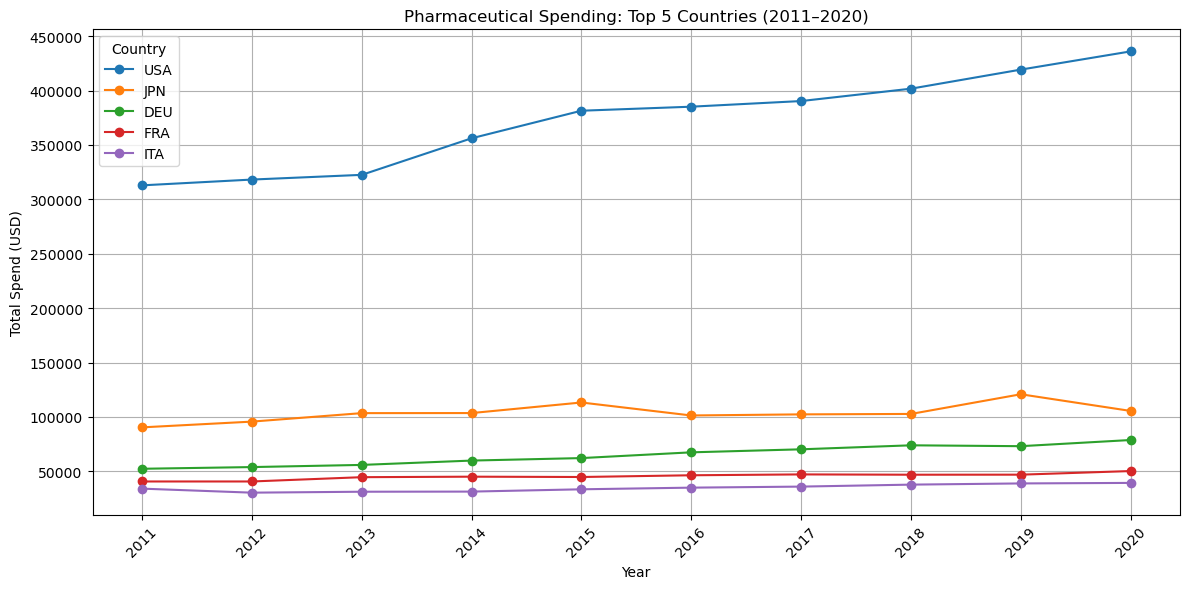

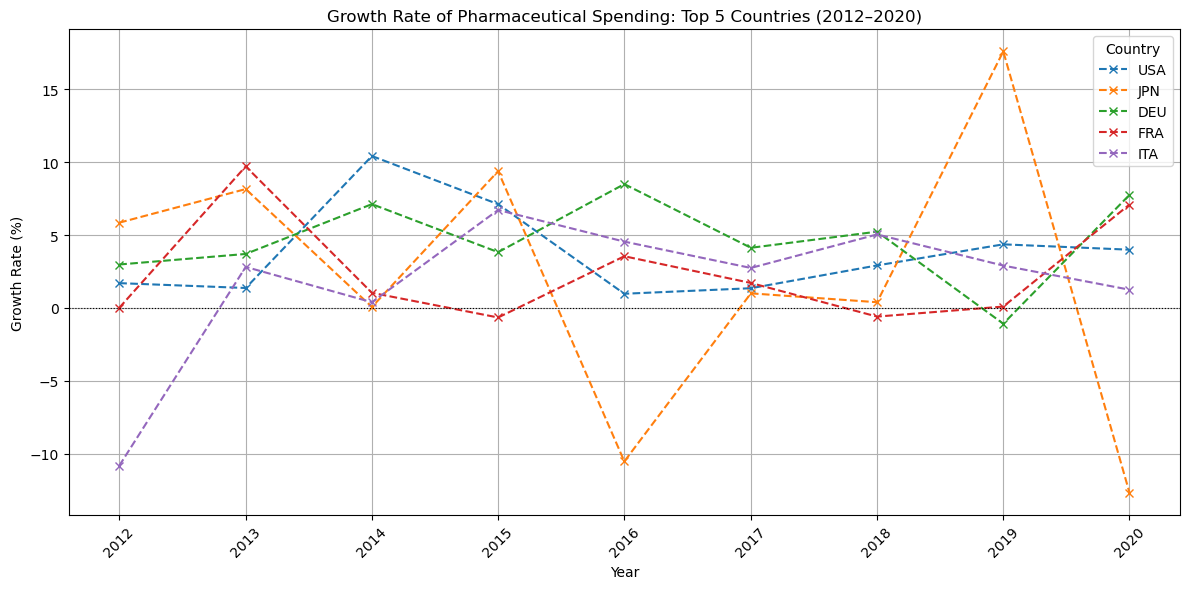

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'TIME' to datetime format
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')

# Filter data for years 2011–2020
df = df[(df['TIME'].dt.year >= 2011) & (df['TIME'].dt.year <= 2020)]

# Calculate average TOTAL_SPEND per country over the selected period
avg_spending = df.groupby('LOCATION')['TOTAL_SPEND'].mean().nlargest(5)
top5_countries = avg_spending.index.tolist()

# Filter for top 5 countries
top5_data = df[df['LOCATION'].isin(top5_countries)].copy()

# Sort by country and time
top5_data = top5_data.sort_values(['LOCATION', 'TIME'])

# Calculate YoY growth rate
top5_data['GROWTH_RATE'] = top5_data.groupby('LOCATION')['TOTAL_SPEND'].pct_change() * 100

# Drop the first year (2011) for each country in growth rate plot since it will be NaN
growth_data = top5_data[top5_data['TIME'].dt.year >= 2012].copy()

# ---------------- PLOT 1: TOTAL SPENDING (2011–2020) ----------------
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = top5_data[top5_data['LOCATION'] == country]
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], marker='o', label=country)

plt.title('Pharmaceutical Spending: Top 5 Countries (2011–2020)')
plt.xlabel('Year')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# ---------------- PLOT 2: YoY GROWTH RATE (2012–2020) ----------------
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = growth_data[growth_data['LOCATION'] == country]
    plt.plot(country_data['TIME'], country_data['GROWTH_RATE'], marker='x', linestyle='--', label=country)

plt.title('Growth Rate of Pharmaceutical Spending: Top 5 Countries (2012–2020)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()
